In [1]:
#importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [5]:
df = pd.read_csv("D:/Downloads/Breast_Cancer_status (1).csv")

In [ ]:
#PREPROCESSING

In [6]:
#a look on the dataset
df.head(10)

,Age,Tumor Size,Estrogen Status,Progesterone Status,Survival Months,Status
0,68,4,Positive,Positive,60,Alive
1,50,35,Positive,Positive,62,Alive
2,58,63,Positive,Positive,75,Alive
3,58,18,Positive,Positive,84,Alive
4,47,41,Positive,Positive,50,Alive
5,51,20,Positive,Positive,89,Alive
6,51,8,Positive,Positive,54,Alive
7,40,30,Positive,Positive,14,Dead
8,40,103,Positive,Positive,70,Alive
9,69,32,Positive,Positive,92,Alive


In [7]:
#checking if there null values
print(df.isnull().sum())

Age                    0
Tumor Size             0
Estrogen Status        0
Progesterone Status    0
Survival Months        0
Status                 0
dtype: int64


In [8]:
#Encoding categorical variables to be numerical, which are (Progesterone Status - Survival Months - Status)
le = LabelEncoder()
df['Estrogen_ENC'] = le.fit_transform(df['Estrogen Status'])  # Positive = 1, Negative = 0
df['Progesterone_ENC'] = le.fit_transform(df['Progesterone Status'])

# Encode 'Status' column manually (Alive = 1, Dead = 0)
df['Status'] = df['Status'].map({'Alive': 1, 'Dead': 0})

# Preview the encoded dataframe
print(df.head(8))

   Age  Tumor Size Estrogen Status Progesterone Status  Survival Months  \
0   68           4        Positive            Positive               60   
1   50          35        Positive            Positive               62   
2   58          63        Positive            Positive               75   
3   58          18        Positive            Positive               84   
4   47          41        Positive            Positive               50   
5   51          20        Positive            Positive               89   
6   51           8        Positive            Positive               54   
7   40          30        Positive            Positive               14   

   Status  Estrogen_ENC  Progesterone_ENC  
0       1             1                 1  
1       1             1                 1  
2       1             1                 1  
3       1             1                 1  
4       1             1                 1  
5       1             1                 1  
6       1       

In [9]:
df_org = df[["Age","Tumor Size","Estrogen_ENC","Progesterone_ENC","Survival Months","Status"]]
df_norm = df_org.copy()

In [10]:
#checking to see if the dataset features needs scalling or not
df_org.describe()

,Age,Tumor Size,Estrogen_ENC,Progesterone_ENC,Survival Months,Status
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,0.933151,0.826541,71.297962,0.846918
std,8.963134,21.119696,0.249791,0.378691,22.921430,0.360111
min,30.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,16.000000,1.000000,1.000000,56.000000,1.000000
50%,54.000000,25.000000,1.000000,1.000000,73.000000,1.000000
75%,61.000000,38.000000,1.000000,1.000000,90.000000,1.000000
max,69.000000,140.000000,1.000000,1.000000,107.000000,1.000000


In [11]:
# List of features needing to be scaled
numeric_features = ['Age', 'Tumor Size', 'Survival Months']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected features
df_norm[numeric_features] = scaler.fit_transform(df_norm[numeric_features])

# Checking the result
print(df_norm.head())

        Age  Tumor Size  Estrogen_ENC  Progesterone_ENC  Survival Months  \
0  1.565253   -1.253661             1                 1        -0.492961   
1 -0.443222    0.214345             1                 1        -0.405695   
2  0.449434    1.540287             1                 1         0.161530   
3  0.449434   -0.590691             1                 1         0.554224   
4 -0.777968    0.498475             1                 1        -0.929288   

   Status  
0       1  
1       1  
2       1  
3       1  
4       1  


In [12]:
# Features (X) and Target (y)
X = df_norm.drop('Status', axis=1)  # all columns except the target
y = df_norm['Status']               # target column (alive=1, dead=0)

# 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking the shape of each set
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2816, 5)
X_test shape: (1208, 5)
y_train shape: (2816,)
y_test shape: (1208,)


In [13]:
#Initializing the model
regressor = LogisticRegression()

#Train the model on training data
regressor.fit(X_train, y_train)

#Predict on test data
y_pred = regressor.predict(X_test)
#View first 10 predictions
print("Predictions:", y_pred[:10])

Predictions: [1 1 1 1 1 1 1 1 1 1]


In [14]:
#Generating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[  70  105]
 [  20 1013]]


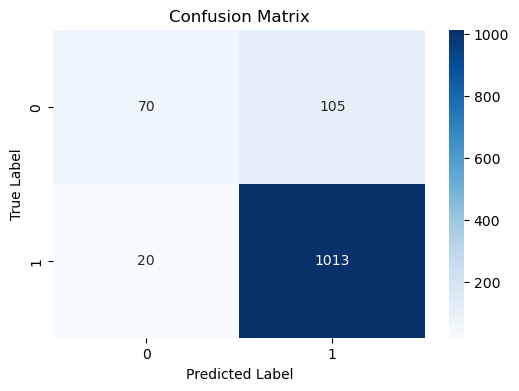

In [15]:
# Using seaborn to visualize it

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

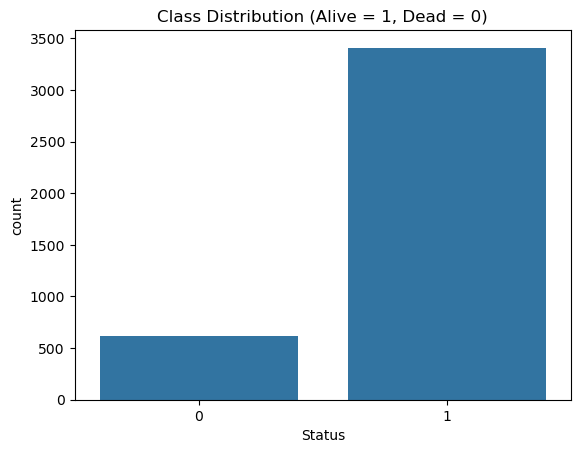

In [16]:
# Plotting class distribution
sns.countplot(x='Status', data=df)
plt.title('Class Distribution (Alive = 1, Dead = 0)')
plt.show()

In [17]:
df_org.head()

,Age,Tumor Size,Estrogen_ENC,Progesterone_ENC,Survival Months,Status
0,68,4,1,1,60,1
1,50,35,1,1,62,1
2,58,63,1,1,75,1
3,58,18,1,1,84,1
4,47,41,1,1,50,1


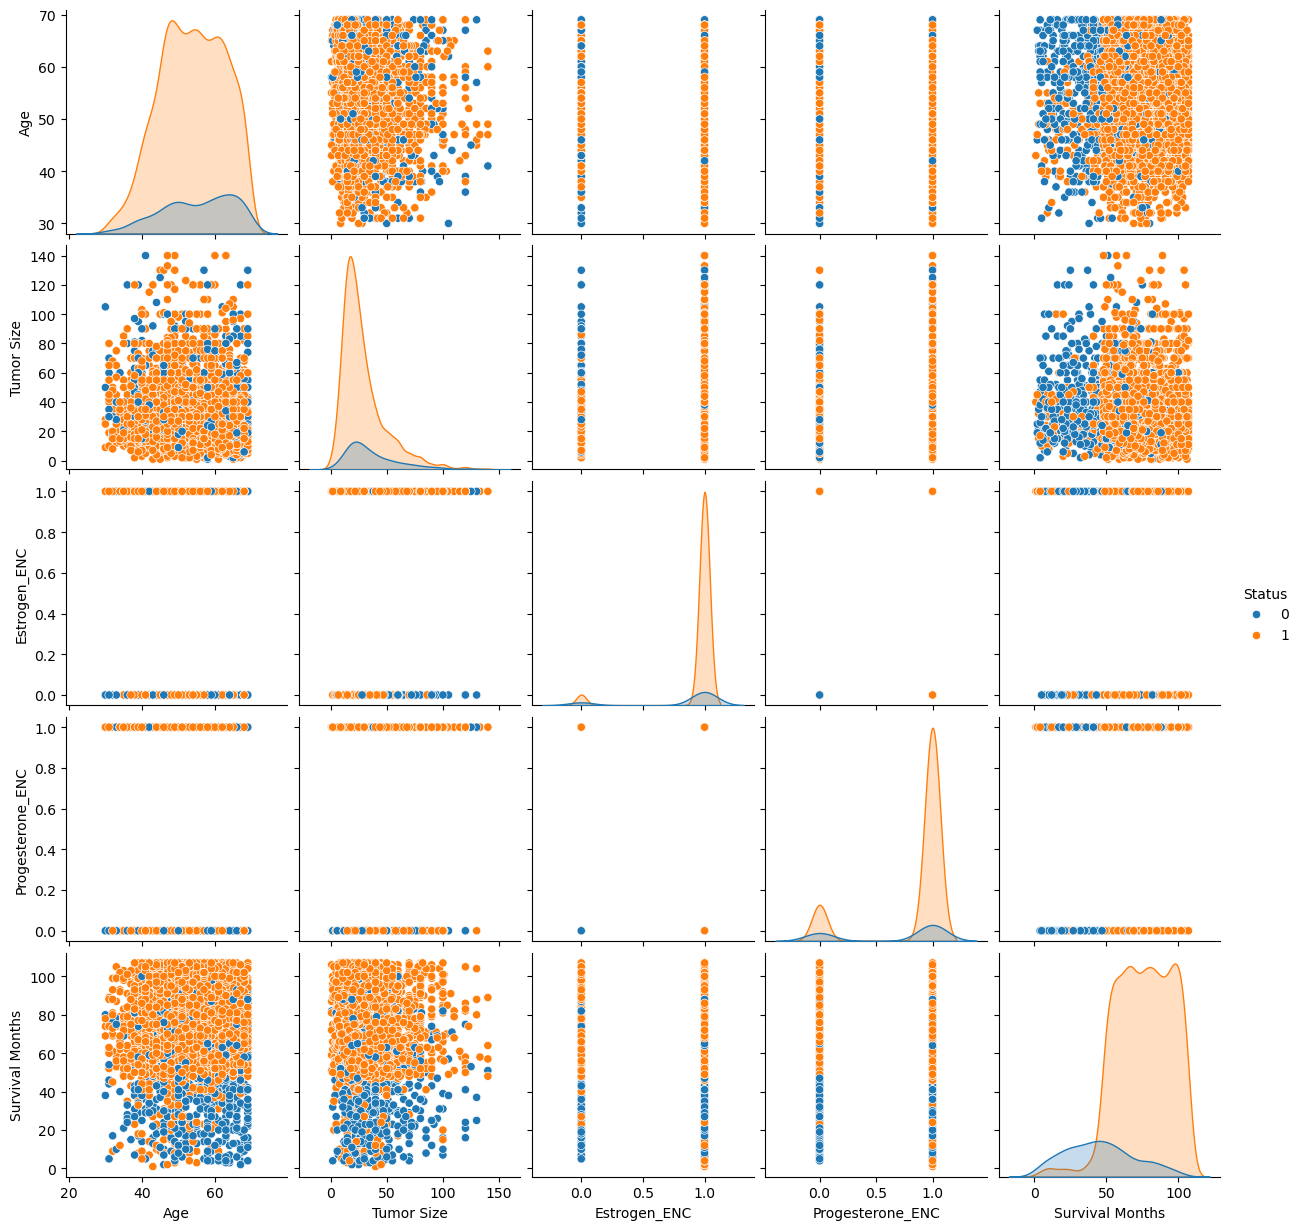

In [18]:
# Pairplot to see relationships between features
sns.pairplot(df_org, hue='Status')
plt.show()

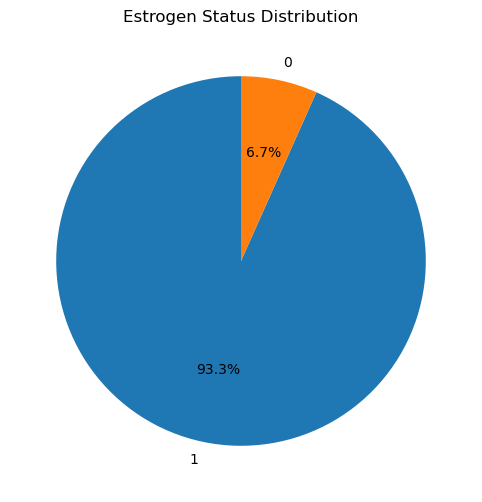

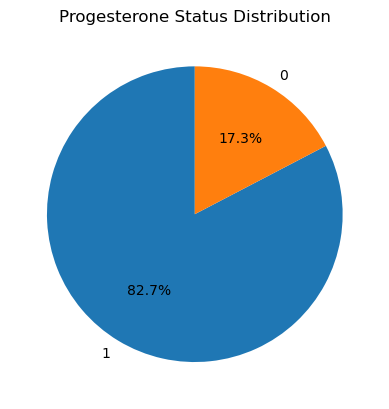

In [19]:
plt.figure(figsize=(12, 6))

# Plot pie chart for Estrogen_ENC
plt.pie(df_org['Estrogen_ENC'].value_counts(), 
        labels=df_org['Estrogen_ENC'].value_counts().index, 
        autopct='%1.1f%%', startangle=90)
plt.title('Estrogen Status Distribution')
plt.show()

# Plot pie chart for Progesterone_ENC
plt.pie(df_org['Progesterone_ENC'].value_counts(), 
        labels=df_org['Progesterone_ENC'].value_counts().index, 
        autopct='%1.1f%%', startangle=90)
plt.title('Progesterone Status Distribution')
plt.show()


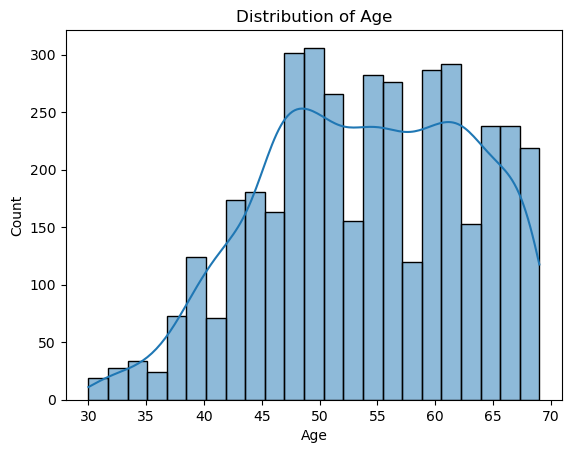

In [20]:
# Histogram for Age
sns.histplot(df_org['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()


In [ ]:
#Support Vector Machine (SVM) Implementation


Kernel type: linear
Accuracy: 0.89
Confusion Matrix:
 [[  65  110]
 [  17 1016]]


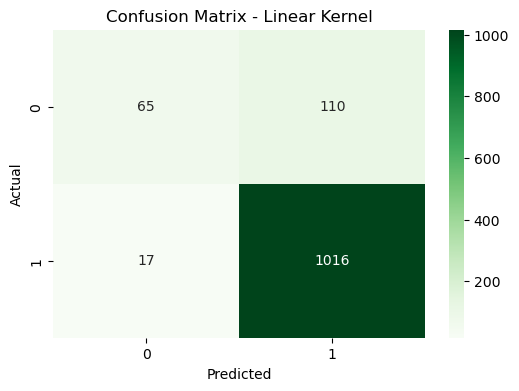


Kernel type: rbf
Accuracy: 0.90
Confusion Matrix:
 [[  65  110]
 [  10 1023]]


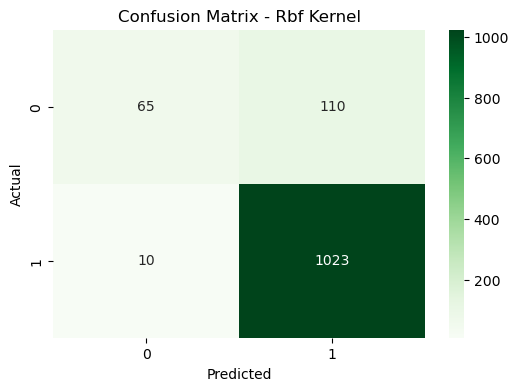


Kernel type: poly
Accuracy: 0.89
Confusion Matrix:
 [[  59  116]
 [  14 1019]]


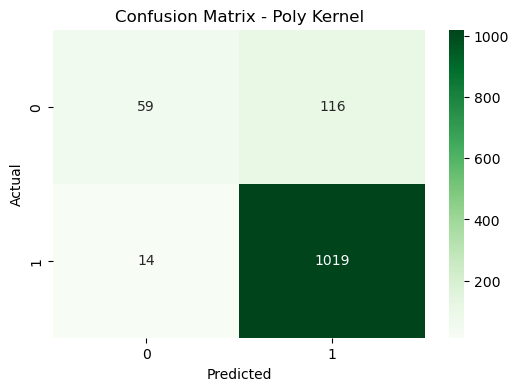

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


# Try different kernels
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    print(f"\nKernel type: {kernel}")

    # Initialize and train the SVM
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)

    # Make predictions
    y_pred_svm = svm_model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred_svm)
    print(f"Accuracy: {acc:.2f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_svm)
    print("Confusion Matrix:\n", cm)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix - {kernel.capitalize()} Kernel')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


***DEEP LEARNING***

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [28]:
model = Sequential()

# Input layer (input shape is determined by the number of features)
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))  # Hidden layer (16 neurons)

# Output layer (since it's a binary classification problem, 1 neuron and sigmoid activation)
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
 

In [30]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8554 - loss: 0.4682 - val_accuracy: 0.8626 - val_loss: 0.3447
Epoch 2/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8590 - loss: 0.3537 - val_accuracy: 0.8924 - val_loss: 0.2936
Epoch 3/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8815 - loss: 0.3118 - val_accuracy: 0.8974 - val_loss: 0.2807
Epoch 4/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8763 - loss: 0.3209 - val_accuracy: 0.9015 - val_loss: 0.2775
Epoch 5/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8935 - loss: 0.3075 - val_accuracy: 0.9007 - val_loss: 0.2774
Epoch 6/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9003 - loss: 0.3000 - val_accuracy: 0.9007 - val_loss: 0.2743
Epoch 7/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8870 - loss: 0.3202 - val_accuracy: 0.9023 - val_loss: 0.2728
Epoch 8/50
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8916 - loss: 0.3046 - val_accuracy: 0.

In [31]:
# Model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8939 - loss: 0.2635 
Test Loss: 0.2642914354801178
Test Accuracy: 0.8998344540596008


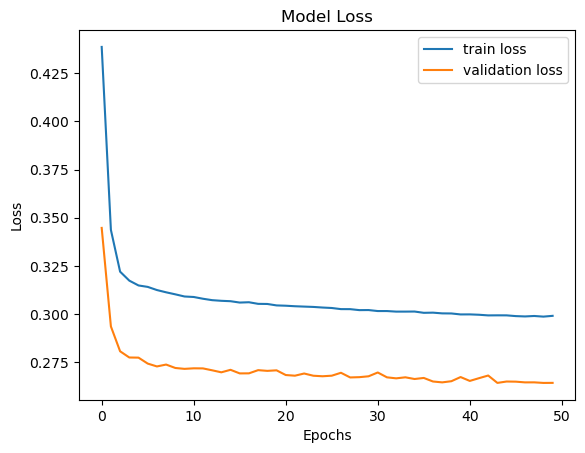

In [32]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [33]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
[[  75  100]
 [  21 1012]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.43      0.55       175
           1       0.91      0.98      0.94      1033

    accuracy                           0.90      1208
   macro avg       0.85      0.70      0.75      1208
weighted avg       0.89      0.90      0.89      1208



In [67]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                           classification_report, roc_curve, auc)

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def compare_svm_nn(svm_model, nn_model, X_test, y_test):
    
    # SVM
    y_pred_svm = svm_model.predict(X_test)
    svm_acc = accuracy_score(y_test, y_pred_svm)
    
    # nn_model
    y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)
    nn_acc = accuracy_score(y_test, y_pred_nn)
    
    
    print("\n" + "="*50)
    print(" Performance comparison".center(50))
    print("="*50)
    
    print(f"\nSVM Accuracy: {svm_acc:.4f}")
    print(f"Neural Network Accuracy: {nn_acc:.4f}")
    
    # two conf_matrix two sides
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(confusion_matrix(y_test, y_pred_svm), 
                annot=True, fmt='d', cmap='Blues')
    plt.title('SVM Confusion Matrix')
    
    plt.subplot(1, 2, 2)
    sns.heatmap(confusion_matrix(y_test, y_pred_nn), 
                annot=True, fmt='d', cmap='Oranges')
    plt.title('Neural Network Confusion Matrix')
    
    plt.tight_layout()
    plt.show()
    
    return {'svm_accuracy': svm_acc, 'nn_accuracy': nn_acc}



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

              Performance comparison              

SVM Accuracy: 0.8924
Neural Network Accuracy: 0.8998


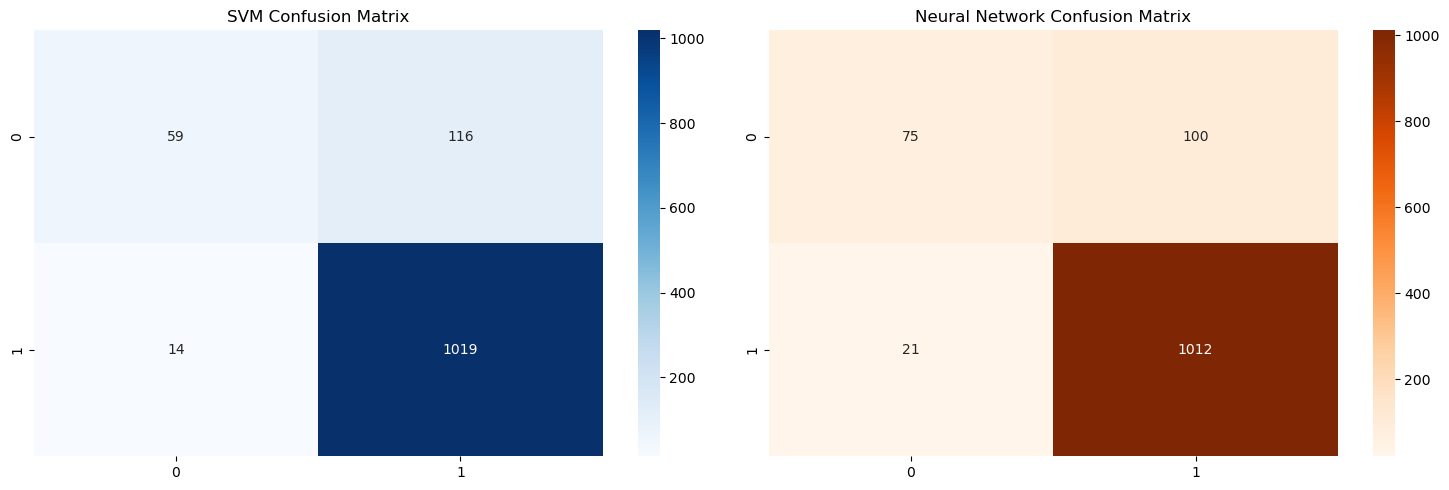

In [98]:
results = compare_svm_nn(
    svm_model=svm_model,  
    nn_model= model,   
    X_test=X_test,        
    y_test=y_test          
)

In [99]:
def generate_reports_and_roc(svm_model, nn_model, X_test, y_test):
    """
   Roc visual
    """
    # SVM
    y_pred_svm = svm_model.predict(X_test)
    svm_report = classification_report(y_test, y_pred_svm)
    
    # nn_model 
    y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)
    nn_report = classification_report(y_test, y_pred_nn)
    
    # reports
    print("\n" + "="*50)
    print(" R E P O R T S".center(50))
    print("="*50)
    
    print("\n[SVM report]")
    print(svm_report)
    
    print("\n{nn_model report]")
    print(nn_report)
    
    if len(np.unique(y_test)) == 2:
        plt.figure(figsize=(8, 6))
        
        # SVM  لـ  ROC 
        svm_scores = svm_model.decision_function(X_test)
        fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_scores)
        roc_auc_svm = auc(fpr_svm, tpr_svm)
        
        #  nn model ل ROC 
        nn_probs = nn_model.predict(X_test).ravel()
        fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_probs)
        roc_auc_nn = auc(fpr_nn, tpr_nn)
        
        # visual
        plt.plot(fpr_svm, tpr_svm, color='blue', 
                label=f'SVM (AUC = {roc_auc_svm:.2f})')
        plt.plot(fpr_nn, tpr_nn, color='orange',
                label=f'Neural Net (AUC = {roc_auc_nn:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')
        plt.legend()
        plt.show()
    else:
        print("\applied for binary only")



38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

                   R E P O R T S                  

[SVM report]
              precision    recall  f1-score   support

           0       0.81      0.34      0.48       175
           1       0.90      0.99      0.94      1033

    accuracy                           0.89      1208
   macro avg       0.85      0.66      0.71      1208
weighted avg       0.88      0.89      0.87      1208


{nn_model report]
              precision    recall  f1-score   support

           0       0.78      0.43      0.55       175
           1       0.91      0.98      0.94      1033

    accuracy                           0.90      1208
   macro avg       0.85      0.70      0.75      1208
weighted avg       0.89      0.90      0.89      1208

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


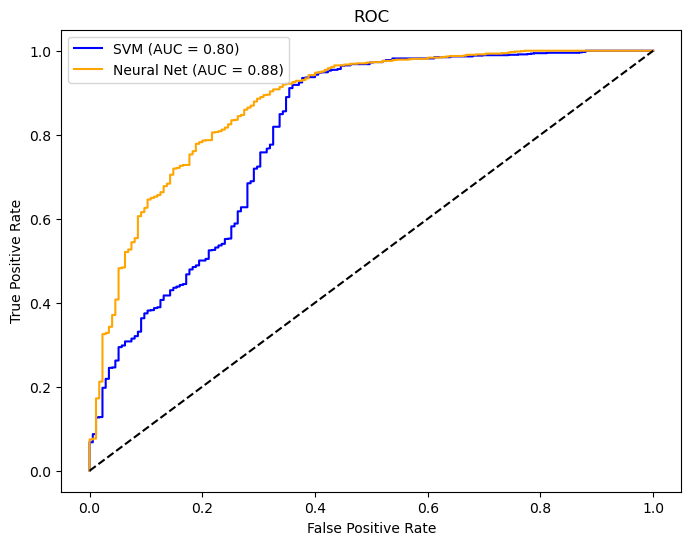

In [100]:
generate_reports_and_roc(
    svm_model=svm_model,  
    nn_model=model,    
    X_test=X_test,        
    y_test=y_test         
)

In [91]:
def plot_training_history(nn_history):
    
    if not hasattr(nn_history, 'history'):
        print("⚠️ nothing date in nn ")
        return
    
    history = nn_history.history
    
    
    plt.figure(figsize=(14, 6))
    
    # ======================================
    # 1. (Accuracy)
    # ======================================
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Training', color='blue')
    if 'val_accuracy' in history:
        plt.plot(history['val_accuracy'], label='Validation', color='orange')
    
    plt.title('Model Accuracy', fontsize=14)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # ======================================
    # 2. (Loss)
    # ======================================
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Training', color='blue')
    if 'val_loss' in history:
        plt.plot(history['val_loss'], label='Validation', color='orange')
    
    
    plt.title('Model Loss', fontsize=14)
    plt.ylabel('Loss', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.suptitle('Training Performance', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()



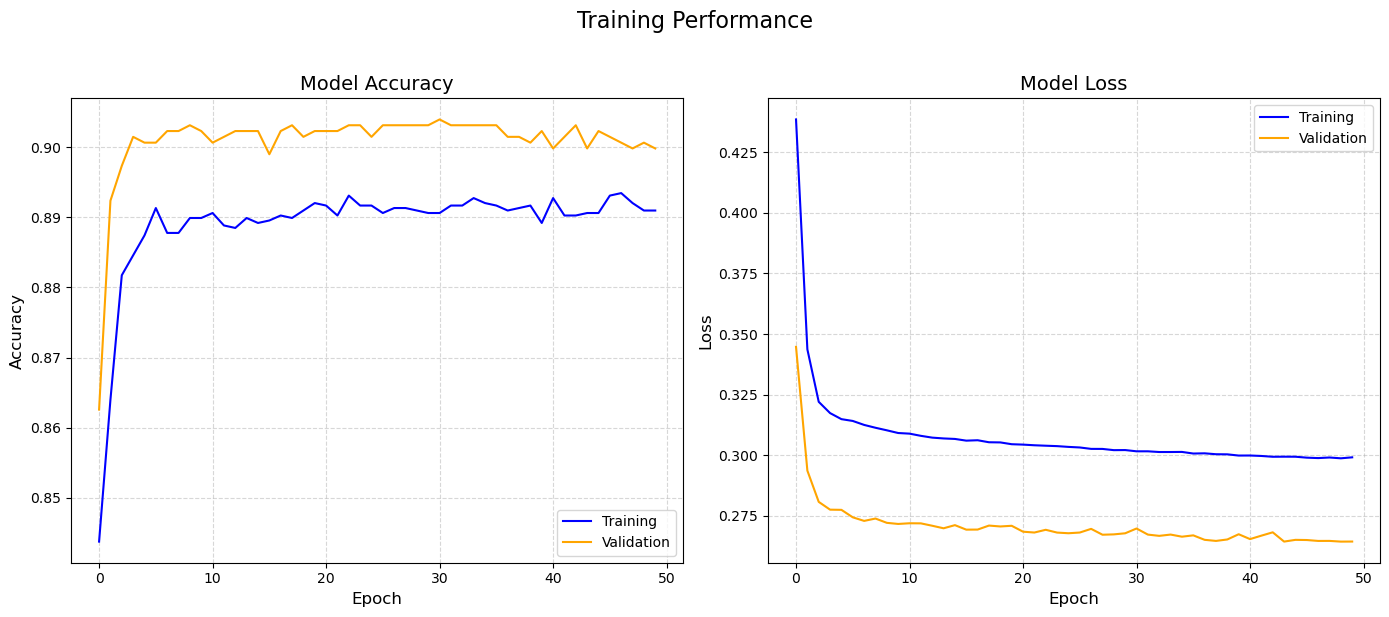

In [92]:
plot_training_history(model.history)